In [1]:
import wikipediaapi

In [2]:
import wikipedia
import warnings
warnings.filterwarnings(action="ignore")


In [3]:
wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

In [4]:
fmathematics={}
for items in wikipedia.search('Mathematics', results=500):
         fmathematics[items]= wiki_wiki.page(items).text

In [5]:
fpolitics={}
for items in wikipedia.search('Politics', results=500):
         fpolitics[items]= wiki_wiki.page(items).text

KeyboardInterrupt: 

In [ ]:
fsports={}
for items in wikipedia.search('sports', results=500):
         fsports[items]= wiki_wiki.page(items).text

In [ ]:
fhealth={}
for items in wikipedia.search('health', results=500):
         fhealth[items]= wiki_wiki.page(items).text

In [ ]:
fhistory={}
for items in wikipedia.search('history', results=500):
         fhistory[items]= wiki_wiki.page(items).text

In [ ]:
fgeography={}
for items in wikipedia.search('geography', results=500):
         fgeography[items]= wiki_wiki.page(items).text

In [ ]:
farts={}
for items in wikipedia.search('arts', results=500):
         farts[items]= wiki_wiki.page(items).text

In [ ]:
ftechnology={}
for items in wikipedia.search('technology', results=500):
         ftechnology[items]= wiki_wiki.page(items).text

In [ ]:
fbiology={}
for items in wikipedia.search('biology', results=500):
         fbiology[items]= wiki_wiki.page(items).text

In [ ]:
ftransport={}
for items in wikipedia.search('transport', results=500):
         ftransport[items]= wiki_wiki.page(items).text

In [ ]:
import pandas as pd

data1=pd.DataFrame.from_dict(fmathematics,orient='index')
data2=pd.DataFrame.from_dict(fpolitics,orient='index')
data3=pd.DataFrame.from_dict(fsports,orient='index')
data4=pd.DataFrame.from_dict(fhealth,orient='index')
data5=pd.DataFrame.from_dict(fhistory,orient='index')
data6=pd.DataFrame.from_dict(fgeography,orient='index')
data7=pd.DataFrame.from_dict(farts,orient='index')
data8=pd.DataFrame.from_dict(ftechnology,orient='index')
data9=pd.DataFrame.from_dict(fbiology,orient='index')
data10=pd.DataFrame.from_dict(ftransport,orient='index')

In [ ]:
data1=pd.DataFrame(fmathematics.items(), columns=['Category', 'Page Text'])

In [ ]:
data2=pd.DataFrame(fpolitics.items(), columns=['Category', 'Page Text'])
data3=pd.DataFrame(fsports.items(), columns=['Category', 'Page Text'])
data4=pd.DataFrame(fhealth.items(), columns=['Category', 'Page Text'])
data5=pd.DataFrame(fhistory.items(), columns=['Category', 'Page Text'])
data6=pd.DataFrame(fgeography.items(), columns=['Category', 'Page Text'])
data7=pd.DataFrame(farts.items(), columns=['Category', 'Page Text'])
data8=pd.DataFrame(ftechnology.items(), columns=['Category', 'Page Text'])
data9=pd.DataFrame(fbiology.items(), columns=['Category', 'Page Text'])
data10=pd.DataFrame(ftransport.items(), columns=['Category', 'Page Text'])


In [ ]:
data1

In [ ]:
data1 = data1.assign(Category='Mathematics')

In [ ]:
data2 = data2.assign(Category='Politics')
data3 = data3.assign(Category='Sports')
data4 = data4.assign(Category='Health')
data5 = data5.assign(Category='History')
data6 = data6.assign(Category='Geography')
data7 = data7.assign(Category='Arts')
data8 = data8.assign(Category='Technology')
data9 = data9.assign(Category='Biology')
data10 = data10.assign(Category='Transport')


In [ ]:
data1


In [ ]:
frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

In [ ]:
fdata = pd.concat(frames,ignore_index=True)

In [ ]:
fdata.shape[0]

In [ ]:
fdata

In [ ]:
fdata.to_csv('wikidata.csv',index= 'False',encoding='utf-8')

In [ ]:
fdata.loc[5,'Page Text']

In [1]:
import pandas as pd
df = pd.read_csv('wikidata.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   Category    5000 non-null   object
 2   Page Text   5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


C:\Users\vedan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Category'>

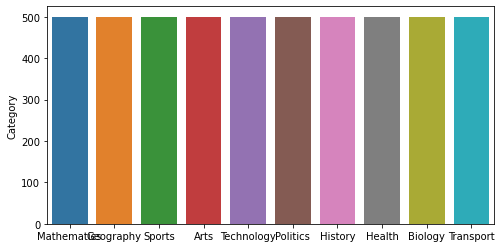

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(df['Category'].value_counts().index, df['Category'].value_counts())

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Unnamed: 0,Category,Page Text
0,0,5,Mathematics (from Ancient Greek μάθημα (máthē...
1,1,5,"In mathematics, a function from a set X to a s..."
2,2,5,The history of mathematics deals with the orig...
3,3,5,"In mathematics, a matrix (plural matrices) is ..."
4,4,5,Applied mathematics is the application of math...


In [5]:
df = df.iloc[: , 1:]

In [6]:
X = df.drop(['Category'], axis=1)
y = df['Category']
print("X --", X.shape, "\ny --", y.shape)

X -- (5000, 1) 
y -- (5000,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, test_X, y_train, test_y = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

train_X, val_X, train_y, val_y = train_test_split(X_train,y_train,test_size=0.15,random_state=0, stratify=y_train)

print("train_X shape: ", train_X.shape)
print("train_y shape: ", train_y.shape)
print("val_X shape: ", val_X.shape)
print("val_y shape: ", val_y.shape)
print("test_X shape: ", test_X.shape)
print("test_y shape: ", test_y.shape)

train_X shape:  (3400, 1)
train_y shape:  (3400,)
val_X shape:  (600, 1)
val_y shape:  (600,)
test_X shape:  (1000, 1)
test_y shape:  (1000,)


In [8]:
train_X['text'] = train_X['Page Text'].str.lower()
train_X.head()

<ipython-input-8-fe2cd0c545f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['text'] = train_X['Page Text'].str.lower()


,Page Text,text
1855,Homelessness is the condition of lacking stabl...,homelessness is the condition of lacking stabl...
4399,The Medusa and the Snail: More Notes of a Biol...,the medusa and the snail: more notes of a biol...
2414,"Milwaukee, Wisconsin's history of over 160 yea...","milwaukee, wisconsin's history of over 160 yea..."
3179,Vancouver Institute of Media Arts (VanArts) is...,vancouver institute of media arts (vanarts) is...
3159,Arts & Business is a charitable organisation w...,arts & business is a charitable organisation w...


In [9]:
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
print("; ".join(stopwords.words('english')))

i; me; my; myself; we; our; ours; ourselves; you; you're; you've; you'll; you'd; your; yours; yourself; yourselves; he; him; his; himself; she; she's; her; hers; herself; it; it's; its; itself; they; them; their; theirs; themselves; what; which; who; whom; this; that; that'll; these; those; am; is; are; was; were; be; been; being; have; has; had; having; do; does; did; doing; a; an; the; and; but; if; or; because; as; until; while; of; at; by; for; with; about; against; between; into; through; during; before; after; above; below; to; from; up; down; in; out; on; off; over; under; again; further; then; once; here; there; when; where; why; how; all; any; both; each; few; more; most; other; some; such; no; nor; not; only; own; same; so; than; too; very; s; t; can; will; just; don; don't; should; should've; now; d; ll; m; o; re; ve; y; ain; aren; aren't; couldn; couldn't; didn; didn't; doesn; doesn't; hadn; hadn't; hasn; hasn't; haven; haven't; isn; isn't; ma; mightn; mightn't; mustn; must

In [10]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword])

train_X['text11'] = train_X['text'].apply(lambda text :remove_stopwords(text))
train_X.head()

<ipython-input-10-29d8284edc61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['text11'] = train_X['text'].apply(lambda text :remove_stopwords(text))


,Page Text,text,text11
1855,Homelessness is the condition of lacking stabl...,homelessness is the condition of lacking stabl...,"homelessness condition lacking stable, safe, a..."
4399,The Medusa and the Snail: More Notes of a Biol...,the medusa and the snail: more notes of a biol...,medusa snail: notes biology watcher 1979 colle...
2414,"Milwaukee, Wisconsin's history of over 160 yea...","milwaukee, wisconsin's history of over 160 yea...","milwaukee, wisconsin's history 160 years immig..."
3179,Vancouver Institute of Media Arts (VanArts) is...,vancouver institute of media arts (vanarts) is...,vancouver institute media arts (vanarts) priva...
3159,Arts & Business is a charitable organisation w...,arts & business is a charitable organisation w...,arts & business charitable organisation whose ...


In [11]:
import numpy as np 
import pandas as pd 
import re
import nltk
import string
punc_to_remove = string.punctuation
print(punc_to_remove)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

train_X["text12"] = train_X["text11"].apply(lambda text: remove_urls(text))
train_X.head()

<ipython-input-12-d2e779de5426>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X["text12"] = train_X["text11"].apply(lambda text: remove_urls(text))


,Page Text,text,text11,text12
1855,Homelessness is the condition of lacking stabl...,homelessness is the condition of lacking stabl...,"homelessness condition lacking stable, safe, a...","homelessness condition lacking stable, safe, a..."
4399,The Medusa and the Snail: More Notes of a Biol...,the medusa and the snail: more notes of a biol...,medusa snail: notes biology watcher 1979 colle...,medusa snail: notes biology watcher 1979 colle...
2414,"Milwaukee, Wisconsin's history of over 160 yea...","milwaukee, wisconsin's history of over 160 yea...","milwaukee, wisconsin's history 160 years immig...","milwaukee, wisconsin's history 160 years immig..."
3179,Vancouver Institute of Media Arts (VanArts) is...,vancouver institute of media arts (vanarts) is...,vancouver institute media arts (vanarts) priva...,vancouver institute media arts (vanarts) priva...
3159,Arts & Business is a charitable organisation w...,arts & business is a charitable organisation w...,arts & business charitable organisation whose ...,arts & business charitable organisation whose ...


In [13]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punc_to_remove))

train_X['text13'] = train_X['text12'].apply(lambda text: remove_punctuation(text))
train_X.head()

<ipython-input-13-e9894a904387>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['text13'] = train_X['text12'].apply(lambda text: remove_punctuation(text))


,Page Text,text,text11,text12,text13
1855,Homelessness is the condition of lacking stabl...,homelessness is the condition of lacking stabl...,"homelessness condition lacking stable, safe, a...","homelessness condition lacking stable, safe, a...",homelessness condition lacking stable safe ade...
4399,The Medusa and the Snail: More Notes of a Biol...,the medusa and the snail: more notes of a biol...,medusa snail: notes biology watcher 1979 colle...,medusa snail: notes biology watcher 1979 colle...,medusa snail notes biology watcher 1979 collec...
2414,"Milwaukee, Wisconsin's history of over 160 yea...","milwaukee, wisconsin's history of over 160 yea...","milwaukee, wisconsin's history 160 years immig...","milwaukee, wisconsin's history 160 years immig...",milwaukee wisconsins history 160 years immigra...
3179,Vancouver Institute of Media Arts (VanArts) is...,vancouver institute of media arts (vanarts) is...,vancouver institute media arts (vanarts) priva...,vancouver institute media arts (vanarts) priva...,vancouver institute media arts vanarts private...
3159,Arts & Business is a charitable organisation w...,arts & business is a charitable organisation w...,arts & business charitable organisation whose ...,arts & business charitable organisation whose ...,arts business charitable organisation whose r...


In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train_X["textstemmed"] = train_X["text13"].apply(lambda text: stem_words(text))
train_X.head()

<ipython-input-14-9de4f02bcf7a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X["textstemmed"] = train_X["text13"].apply(lambda text: stem_words(text))


,Page Text,text,text11,text12,text13,textstemmed
1855,Homelessness is the condition of lacking stabl...,homelessness is the condition of lacking stabl...,"homelessness condition lacking stable, safe, a...","homelessness condition lacking stable, safe, a...",homelessness condition lacking stable safe ade...,homeless condit lack stabl safe adequ hous def...
4399,The Medusa and the Snail: More Notes of a Biol...,the medusa and the snail: more notes of a biol...,medusa snail: notes biology watcher 1979 colle...,medusa snail: notes biology watcher 1979 colle...,medusa snail notes biology watcher 1979 collec...,medusa snail note biolog watcher 1979 collect ...
2414,"Milwaukee, Wisconsin's history of over 160 yea...","milwaukee, wisconsin's history of over 160 yea...","milwaukee, wisconsin's history 160 years immig...","milwaukee, wisconsin's history 160 years immig...",milwaukee wisconsins history 160 years immigra...,milwauke wisconsin histori 160 year immigr of ...
3179,Vancouver Institute of Media Arts (VanArts) is...,vancouver institute of media arts (vanarts) is...,vancouver institute media arts (vanarts) priva...,vancouver institute media arts (vanarts) priva...,vancouver institute media arts vanarts private...,vancouv institut media art vanart privat posts...
3159,Arts & Business is a charitable organisation w...,arts & business is a charitable organisation w...,arts & business charitable organisation whose ...,arts & business charitable organisation whose ...,arts business charitable organisation whose r...,art busi charit organis whose role develop par...


In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

train_X["text_lemmatized"] = train_X["textstemmed"].apply(lambda text: lemmatize_words(text))
train_X.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-15-cebe0294567a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X["text_lemmatized"] = train_X["textstemmed"].apply(lambda text: lemmatize_words(text))


,Page Text,text,text11,text12,text13,textstemmed,text_lemmatized
1855,Homelessness is the condition of lacking stabl...,homelessness is the condition of lacking stabl...,"homelessness condition lacking stable, safe, a...","homelessness condition lacking stable, safe, a...",homelessness condition lacking stable safe ade...,homeless condit lack stabl safe adequ hous def...,homeless condit lack stabl safe adequ hous def...
4399,The Medusa and the Snail: More Notes of a Biol...,the medusa and the snail: more notes of a biol...,medusa snail: notes biology watcher 1979 colle...,medusa snail: notes biology watcher 1979 colle...,medusa snail notes biology watcher 1979 collec...,medusa snail note biolog watcher 1979 collect ...,medusa snail note biolog watcher 1979 collect ...
2414,"Milwaukee, Wisconsin's history of over 160 yea...","milwaukee, wisconsin's history of over 160 yea...","milwaukee, wisconsin's history 160 years immig...","milwaukee, wisconsin's history 160 years immig...",milwaukee wisconsins history 160 years immigra...,milwauke wisconsin histori 160 year immigr of ...,milwauke wisconsin histori 160 year immigr of ...
3179,Vancouver Institute of Media Arts (VanArts) is...,vancouver institute of media arts (vanarts) is...,vancouver institute media arts (vanarts) priva...,vancouver institute media arts (vanarts) priva...,vancouver institute media arts vanarts private...,vancouv institut media art vanart privat posts...,vancouv institut medium art vanart privat post...
3159,Arts & Business is a charitable organisation w...,arts & business is a charitable organisation w...,arts & business charitable organisation whose ...,arts & business charitable organisation whose ...,arts business charitable organisation whose r...,art busi charit organis whose role develop par...,art busi charit organis whose role develop par...


In [16]:
train_X.drop(['Page Text', 'text', 'text11', 'text12', 'text13','textstemmed'], axis=1, inplace=True)

C:\Users\vedan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
train = train_X.join(train_y)
train.head()

,text_lemmatized,Category
1855,homeless condit lack stabl safe adequ hous def...,3
4399,medusa snail note biolog watcher 1979 collect ...,1
2414,milwauke wisconsin histori 160 year immigr of ...,4
3179,vancouv institut medium art vanart privat post...,0
3159,art busi charit organis whose role develop par...,0


C:\Users\vedan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Category'>

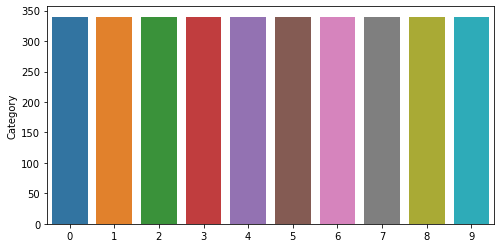

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(train['Category'].value_counts().index, train['Category'].value_counts())

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=3500)

In [20]:
train_vector = bow.fit_transform(train_X['text_lemmatized']).toarray()
train_vector

array([[5, 3, 3, ..., 7, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 3, 0, ..., 2, 0, 2]], dtype=int64)

In [21]:
def preprocessing(df):
    df['msg_lower'] = df['Page Text'].str.lower()
    df["msg_wo_url"] = df["msg_lower"].apply(lambda text: remove_urls(text))
    df['msg_wo_stopword'] = df['msg_wo_url'].apply(lambda text :remove_stopwords(text))
    df['msg_wo_punc'] = df['msg_wo_stopword'].apply(lambda text: remove_punctuation(text))
    df["text_lemmatized"] = df["msg_wo_punc"].apply(lambda text: lemmatize_words(text))
    df.drop(['Page Text', 'msg_lower', 'msg_wo_url', 'msg_wo_stopword', 'msg_wo_punc'], axis=1, inplace=True)
    return df

In [22]:
val_X = preprocessing(val_X)
print(val_X.shape)
val_vector = bow.transform(val_X['text_lemmatized']).toarray()
val_vector

<ipython-input-21-9effca36fd2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_lower'] = df['Page Text'].str.lower()
<ipython-input-21-9effca36fd2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["msg_wo_url"] = df["msg_lower"].apply(lambda text: remove_urls(text))
<ipython-input-21-9effca36fd2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

(600, 1)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 2,  2,  2, ...,  0,  0, 12],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [23]:
text_X= preprocessing(test_X)
print(test_X.shape)
test_vector = bow.transform(test_X['text_lemmatized']).toarray()
test_vector

<ipython-input-21-9effca36fd2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_lower'] = df['Page Text'].str.lower()
<ipython-input-21-9effca36fd2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["msg_wo_url"] = df["msg_lower"].apply(lambda text: remove_urls(text))
<ipython-input-21-9effca36fd2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

(1000, 1)


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB().fit(train_vector,train_y)

accuracy is  0.7683333333333333


<AxesSubplot:>

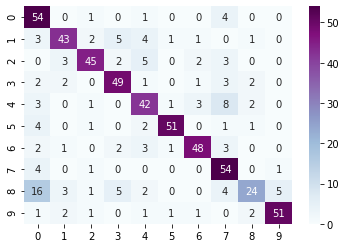

In [54]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


val_pred_nb = nb.predict(val_vector)
print ("accuracy is "  ,accuracy_score(val_y,val_pred_nb))
cm=confusion_matrix(val_y,val_pred_nb)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')




accuracy is  0.766
recall is  [0.9  0.75 0.75 0.87 0.65 0.72 0.77 0.97 0.47 0.81]
precision is  [0.56962025 0.82417582 0.87209302 0.82075472 0.65656566 0.85714286
 0.89534884 0.7578125  0.71212121 0.84375   ]


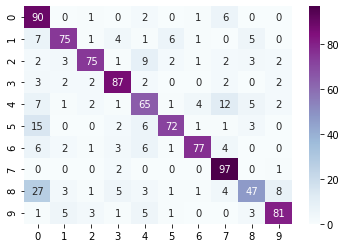

In [62]:
test_pred_nb = nb.predict(test_vector)
print ("accuracy is " ,accuracy_score(test_y,test_pred_nb))


cm = confusion_matrix(test_y,test_pred_nb)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')
recalls = np.diag(cm) / np.sum(cm, axis = 1)
print ("recall is " ,recalls)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print ("precision is " ,precision)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0).fit(train_vector,train_y)

accuracy is  0.7483333333333333


<AxesSubplot:>

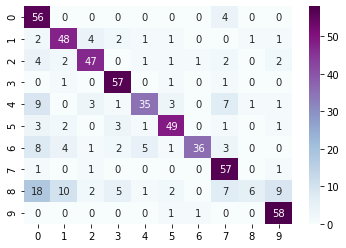

In [57]:
val_pred_rfc = rfc.predict(val_vector)
print ("accuracy is " ,accuracy_score(val_y,val_pred_rfc))
cm=confusion_matrix(val_y,val_pred_rfc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')



accuracy is  0.735
recall is  [0.96 0.82 0.73 0.96 0.52 0.8  0.54 0.98 0.1  0.94]
precision is  [0.5106383  0.7961165  0.81111111 0.71641791 0.65822785 0.94117647
 0.98181818 0.73684211 0.90909091 0.7704918 ]


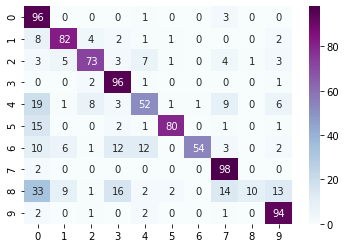

In [63]:
test_pred_rfc = rfc.predict(test_vector)
print ("accuracy is " ,accuracy_score(test_y,test_pred_rfc))
cm = confusion_matrix(test_y,test_pred_rfc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')
recalls = np.diag(cm) / np.sum(cm, axis = 1)
print ("recall is " ,recalls)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print ("precision is " ,precision)

In [59]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression().fit(train_vector,train_y)

C:\Users\vedan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy is  0.7683333333333333


<AxesSubplot:>

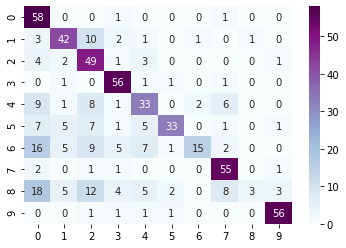

In [60]:
val_pred_lrc = lrc.predict(val_vector)
print ("accuracy is " ,accuracy_score(val_y,val_pred_nb))
cm=confusion_matrix(val_y,val_pred_lrc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')


accuracy is  0.698
recall is  [0.99 0.68 0.79 0.97 0.56 0.58 0.31 0.98 0.2  0.92]
precision is  [0.50769231 0.71578947 0.56834532 0.776      0.59574468 0.85294118
 0.775      0.85964912 0.8        0.87619048]


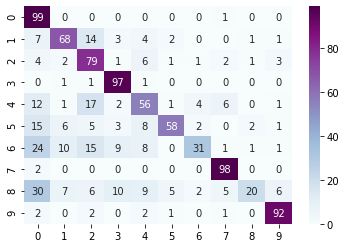

In [64]:
test_pred_lrc = lrc.predict(test_vector)
print ("accuracy is " ,accuracy_score(test_y,test_pred_lrc))

cm = confusion_matrix(test_y,test_pred_lrc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')
recalls = np.diag(cm) / np.sum(cm, axis = 1)
print ("recall is " ,recalls)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print ("precision is " ,precision)